# Perceptrón

El algoritmo del perceptrón aprende los parámetros a partir de la iteración a partir de una regla de actualización basada en una interpretación del ángulo entre los vectores ejemplos y el vector de pesos.
El perceptrón es una formalización de una neurona que procesa estímulos y emite una señal; se utiliza para realizar clasificación (binaria generalmente).

El percpetrón es un clasificador lineal; es decir, se basa en encontrar un hiperplano que separe los datos en clases binarias (0 y 1) en base a la función:

$$f(x) = \begin{cases} 1 & \text{si } wx +b > 0 \\ 0 & \text{si } wx+b \leq 0  \end{cases}$$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer

## Problemas lógicos con el percpetrón

Los problemas lógicos AND, OR, NOT son fáciles de solucionar con el perceptrón, aquí podemos ver algunas formas de solucionar estos problemas dando los valores de los pesos de las conexiones. Pero también es claro que estos pesos pueden aprenderse:

In [2]:
#Perceptrón AND
def AND(x):
    w = np.array([1,1])
    return 1*(np.dot(x,w)-1.5 > 0)

#Perceptrón OR
def OR(x):
    w = np.array([1,1])
    return 1*(np.dot(x,w)-0.5 > 0)

#Perceptrón NOT x_1
def NOT(x):
    try:
        w = np.array([-1,0])
        return 1*(np.dot(x,w) + 0.5 > 0)
    except:
        return 1*(-x + 0.5 > 0)

Ahora podemos ver que cada uno de estos valores nos da la clasificación correspondiente al problema lógico indicado:

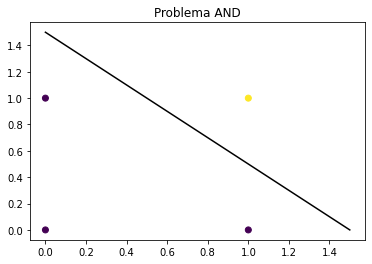

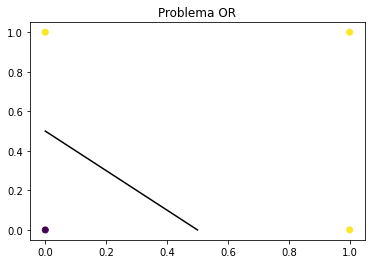

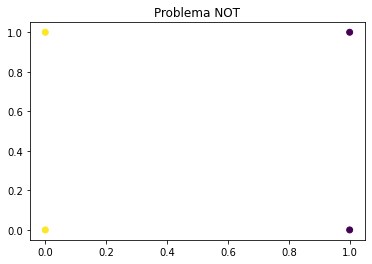

In [3]:
#Puntos en un cuadrado en R2
X = np.array([[0,1],[1,0],[0,0],[1,1]])

#Aplicación de perceptrón AND
plt.plot([0, 1.5], [1.5, 0],'k-')
plt.scatter(X[:,0], X[:,1], c=AND(X))
plt.title('Problema AND')
plt.show()

#Aplicación de perceptrón OR
plt.plot([0, 0.5], [0.5, 0],'k-')
plt.scatter(X[:,0], X[:,1], c=OR(X))
plt.title('Problema OR')
plt.show()

#Aplicación de perceptrón NOT
plt.plot([0, 0.5], [np.inf, 0],'k-')
plt.scatter(X[:,0], X[:,1], c=NOT(X))
plt.title('Problema NOT')
plt.show()

## Perceptrón en un dataset de clasificación

### Preparación de los datos

Una parte immportante de toda red neuronal son los datos con los que va a entrenarse. Estos datos le ayudarán a ajustar sus parámetros (pesos) y, de esta forma, crear una función capaz de generalizar la tarea que ha aprendido.

Los datos pueden verse como vectores aleatorios; es decir, como vectores cuyas entradas son variables aleatorias. Así, un vector aleatorio se ve como:

$$X^T = [X_1, X_2, ..., X_n]$$

En este caso usamos el dataset de <i>breast_cancer</i> para diagnóstico mético que se encuentra en sklearn.

In [4]:
#carga de los datos
data = load_breast_cancer()
#Obtención del dataset
X = data.data
Y = data.target

#Nombre de los rasgos
feats = data.feature_names
#Tabla en pandas
table_data = pd.DataFrame(data=X, columns=feats)
table_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Es importante ahora separar los datos en datos de entrenamiento y datos de evaluación, para poder determinar la calidad del método.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

#### Visualización de los ejemplos

En su calidad de vecotres, podemos visualizar cómo se comportan en un espacio vectorial. Para esto, utilizamos una técnica de reducción de dimensionadlida, PCA. Si bien los vectores no parecen linealmente separables, se verá al aplicar el perceptrón que, en su espacio oroginial, existe un hiperplano capaz de separar estos datos. Esto depende en gran medida de la selección de las variables aleatorias que definen los ejemplos.

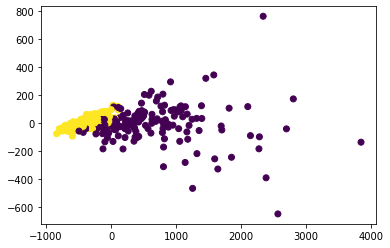

In [6]:
#Reducción por PCA
RedX = PCA(2).fit_transform(x_train)
#Ploteo
plt.scatter(RedX[:,0], RedX[:,1], c=y_train)
plt.show()

### Algoritmo del perceptrón

El perceptrón es un algoritmo de aprendizaje estadístico que busca estimar las clases de un conjunto de datos a partir de la función de decisión:

$$f(x; \theta) = \begin{cases} 1 & \text{ si } wx + b > 0 \\ 0 & \text{ si } wx + b \leq 0\end{cases}$$

Aquí $x$ es un vector de entrada. La función f depende de $\theta = {w,b}$ que representa los parámetros o los pesos de la red: $w$ contienen los pesos de las conexiones y $b$ es el bias. Definimos esta función a continuación:

In [7]:
#Función de decisión
f = lambda x, theta: (np.dot(x,theta) >= 0).astype(np.int)

El objetivo del algoritmo del perceptrón es obtener los parámetros $\theta$ adecuados para que la red pueda clasificar adecuadamente los ejemplos. Este algoritmo es iterativo y busca minimizar el cuánto se equivoca la red en cada paso. 

Antes de entrar de lleno al este algoritmo, agregaremos una columna más a la matriz de datos de entrenamiento; esto con el objetivo de que esta columna represente el bias, de tal forma que sólo actualicemos sobre un vector de parámetros:

In [8]:
#Se agrega una columna para bias
x_train_bias = np.append(x_train, np.ones((x_train.shape[0],1)),axis=1)

Para inicializar el algoritmo del perceptron, tomaremos un vector $w \in \mathbb{R}^{n+1}$, donde $n$ es el número de variables (la dimensión de los vectores ejemplos) y el $+1$ responde al bias. Asimismo, estableceremos un número máximo de iteraciones (en caso de que el algoritmo no sea capaz de minimizar el error) y, finalmente, estableceremos un rango de aprendizaje.

In [9]:
#Parámetros
w = np.ones(x_train.shape[1] + 1)

#Núm. max de iteraciones
its = 1000
#Learning rate
lr = 0.001

Para entrenar la red, utilizaremos el algoritmo del perceptrón. Este consta de dos partes:

* Forward. Para cada ejemplo $x$, se computará la función $f(x; \theta)$
* Backward. Se actualizarán los pesos de $\theta = {w,b}$ por medio de la regla: $$w_i \leftarrow w_i - \eta (f(x;\theta)-y_x)x_i$$ Donde $y_x$ es la clase a la que pertenence el ejemplo $x$.

El algoritmo iterará hasta que el error $f(x; \theta) -y$ sea 0 o cuando se cumpla el número máximo de iteraciones.

In [10]:
#Detenerse
stop = False
t = 0
while  stop == False:
    #Guradamos el error
    epoch_error = 0
    for x,y in zip(x_train_bias, y_train):
        #FORWARD
        #Calculamos la predicción
        pred = f(x,w)
        
        #BACKWATD
        #Obtenemos eror f-y
        err = pred - y
        #Guardamos el error de la epoca
        epoch_error += err
        #Actualizamos los pesos
        w -= lr*err*x
    
    print('Época {} con error {}'.format(t, (epoch_error).sum()))
    
    t += 1
    #Criterio de paro
    if epoch_error.sum() == 0 or t > its: 
        stop = True

Época 0 con error -51
Época 1 con error -29
Época 2 con error -25
Época 3 con error -19
Época 4 con error -15
Época 5 con error -19
Época 6 con error -11
Época 7 con error -12
Época 8 con error -12
Época 9 con error -9
Época 10 con error -12
Época 11 con error -7
Época 12 con error -11
Época 13 con error -8
Época 14 con error -8
Época 15 con error -8
Época 16 con error -8
Época 17 con error -8
Época 18 con error -8
Época 19 con error -8
Época 20 con error -5
Época 21 con error -8
Época 22 con error -6
Época 23 con error -5
Época 24 con error -5
Época 25 con error -3
Época 26 con error -6
Época 27 con error -5
Época 28 con error -2
Época 29 con error -8
Época 30 con error -4
Época 31 con error -2
Época 32 con error -2
Época 33 con error -4
Época 34 con error -2
Época 35 con error -2
Época 36 con error -7
Época 37 con error -2
Época 38 con error -2
Época 39 con error -5
Época 40 con error -5
Época 41 con error -2
Época 42 con error -1
Época 43 con error -3
Época 44 con error -2
Época 45 

### Evaluación

Como hemos incorporado el bias a la función del perceptrón, ahora podemos incorporar un 1 a los datos o definir una función indicando cuál es el bias. Obtamos por esta última opción. En base a esta función, entonces, evaluaremos los puntos del test set y veremos qué tan bien lo ha hecho el perceptrón para este problema.

In [11]:
#Nueva función con los pesos aprendidos
#Hemos incorporado el bias aparte (b = w[-1])
f_w = lambda x: (np.dot(x,w[:-1] + w[-1]) >= 0).astype(np.int)

#Procedemos a aplicar el perceptrón al testset
test_pred = f_w(x_test)
#Evaluamos
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61        59
           1       0.77      1.00      0.87       112

    accuracy                           0.81       171
   macro avg       0.89      0.72      0.74       171
weighted avg       0.85      0.81      0.78       171



#### Exploración de la red

El perceptrón es un algoritmo que, por su simplicidad, es fácilmente interpretable. Dado que los ejemplos positivos (aquellos que sí son gatos) tienen que ser mayores a 0, mientras que los negativos serán menores a 0, el algoritmo otorga a las variables que influyen más en una desición positiva valores negativos; es decir, las conexiones que ayudan a discriminar si el vector de entrada describe un gato son conexiones fuertes (positivas), mientras que las que influyen negativamente tendrás conexiones negativas. Podemos observar entonces que peso se asigna en la red a cada variable.

In [12]:
weights = pd.DataFrame(data=w, index=[str(f) for f in feats]+['bias'], columns=['pesos'])
weights

,pesos
mean radius,5.699237
mean texture,1.854740
mean perimeter,23.915560
mean area,4.945200
mean smoothness,1.014488
mean compactness,0.844508
mean concavity,0.717656
mean concave points,0.896908
mean symmetry,1.015586
mean fractal dimension,1.017946


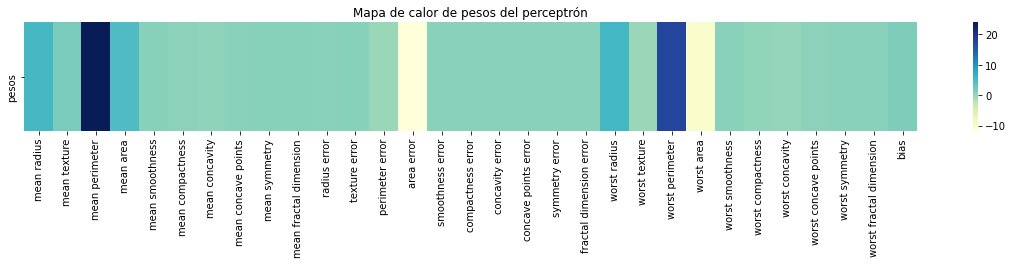

In [13]:
#Visualización de los pesos en mapa de calor
plt.figure(figsize=(20,2))
sns.heatmap(weights.T, cmap="YlGnBu")
plt.title('Mapa de calor de pesos del perceptrón')
plt.show()

## Inferencia de probabilidades con perceptrón

El problema de de clasificación puede verse como un problema de estimación donde seleccionamos la probabilidad de clase más alta. Esto se formaliza como:

$$\hat{y} = \arg\max_y p(Y=y|X_1,...,X_n)$$

Sin embargo, en el algoritmo del perceptrón no hemos estimado ninguna probabilidad, sólo hemos decidido a partir de la fuerza del estímulo (si este es mayor a 0 se toma la clase 1, si es menor la clase 0). Con los parámetros aprendidos, podemos ver cómo se comportan los datos con respecto a esta decisión. Para esto mapearemos los escalares $wx+b$ en el eje $x$, mientras que en el eje $y$ se tienen las clases.

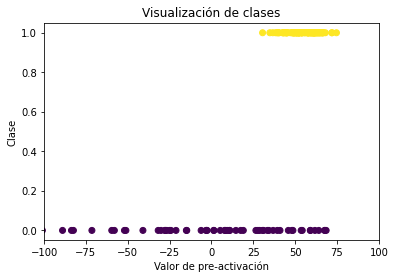

In [14]:
w_norm = w/np.linalg.norm(w)
affin_values = np.dot(x_test,w_norm[:-1] + w_norm[-1])
#Ploteo de la calsificación del perceptrón
plt.scatter(affin_values, y_test, c=y_test)
plt.xlim([-100, 100])
plt.xlabel('Valor de pre-activación')
plt.ylabel('Clase')
plt.title('Visualización de clases')
plt.show()

Los puntos de la clase 1 están arriba, mientras que los de la clase 0 abajo. Los puntos más cercanos a 0 son los más dificiles de decidir. En este sentido, se tiene mayor certeza cuando el punto está más alejado del 0, pues es claro que entre más positivo sea un caso con más certeza se puede asegurar que es de la clase 1. En sentido estricto, diremos que es más probable que pertenezca a la clase 1. Por tanto, estipulamos que podemos definir una función de probabilidad que nos diga esto. Para esto, debemos buscar una función suave que aproxime la posición de los datos. La función que buscamos es la función sigmoide, y esta dada por:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

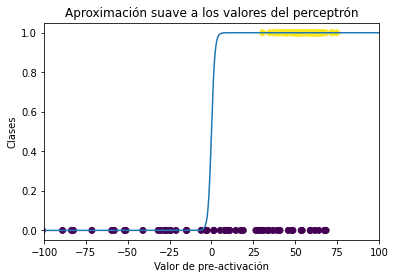

In [15]:
#Función sigmoide
sig = lambda x: 1./(1.+np.exp(-x))

#Sigmoide escala de los datos
sig_data = np.array([sig(k) for  k in np.linspace(-100,100, num=1000)])
#Ploteo del sigmoide con relación a la clasificación del perceptrón
plt.plot(np.linspace(-100,100, num=1000), sig_data)
plt.scatter(affin_values, y_test, c=y_test)
plt.xlim([-100, 100])
plt.xlabel('Valor de pre-activación')
plt.ylabel('Clases')
plt.title('Aproximación suave a los valores del perceptrón')
plt.show()

Está función tiene las proiedades siguientes:

* Es continua y derivable derivable
* Converge a 1 cuando $x\to\infty$
* Converge a 0 cuando $x\to -\infty$

En este sentido es una función con valores en $[0,1]$. Tomaremos al sigmoide como una función de probabilidad. En este sentido, la estimación de probabilidad a aprtir del perceptrón puede verse como:

$$p(Y=1|x) = \sigma(wx+b)$$

Por su  parte, la probabilidad de la clase negatica está dada por:

$$p(Y=0|x) = 1-\sigma(wx+b) = \sigma(-wx-b)$$

Esto euivale a proyectar los puntos obtenidos con la preactivación del perceptrón $wx+b$ en la función sigmoide, como puede verse a continuación: así, los puntos más alejados de 0 positivamente quedarán en la sección del sigmoide más cercana a 1, mientras que los que se alejan negativamente quedarán en la sección del sigmoide más cercana a 0.

A continuación mostramos esta proyección en los datos.

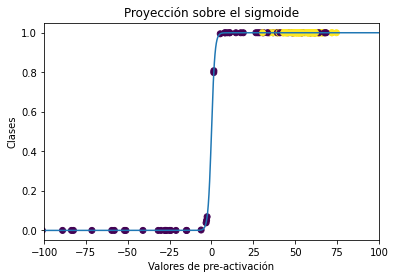

In [16]:
plt.plot(np.linspace(-100,100, num=1000), sig_data)
plt.scatter(affin_values, sig(affin_values), c=y_test)
plt.xlim([-100, 100])
plt.xlabel('Valores de pre-activación')
plt.ylabel('Clases')
plt.title('Proyección sobre el sigmoide')
plt.show()

De esta forma, los puntos más cercanos a 0 tenderán a tener una prbabilidad cercana a $0.5$. De tal forma que podemos reformular la función de desción del perceptrón de la forma siguiente:

$$f_\sigma(x; \theta) = \begin{cases} 1 & \text{ si } \sigma(wx + b) > 0.5 \\ 0 & \text{ si } \sigma(wx) + b \leq 0.5\end{cases}$$

Está función tendrá los mismos resultados que la función rígida de desición. Pero esta función tiene la ventaja de ser derivable, por lo que se podrán utilizar métodos de optimización basadas en gradiente. Por tanto, en adelante ocuparemos funciones de este tipo y no rígidas como las del perceptrón.

Finalmente, podemos ver las prbabilidades para cada ejemplo:

In [17]:
table_data['y'] = Y
table_data['p(y|x)'] = sig(np.dot(X,w_norm[:-1]) + w_norm[-1])
table_data[['y', 'p(y|x)']]

<ipython-input-15-41612c675ea0>:2: RuntimeWarning: overflow encountered in exp
  sig = lambda x: 1./(1.+np.exp(-x))


,y,p(y|x)
0,0,7.032718e-138
1,0,9.226383e-101
2,0,3.053544e-82
3,0,2.882955e-06
4,0,2.321674e-58
...,...,...
564,0,2.706460e-108
565,0,4.064542e-81
566,0,4.856053e-35
567,0,3.810146e-81


Como puede observarse, a partir de cambiar la función de activación en la salida, se obtiene no valores discretos que representan una clase, si no valores probabilísticos. Se puede observar que si el valor es menor o igual a 0.5 es porque el ejemplo pertenece a la calse 0, de otro modo pertenece a la calse 1. A diferencia del perceptrón, este método nos permite dar una probabilidad de que pertenezca a cada una de las clases. Para la clase 1, la probabilidad es $p(Y=1|X) = \sigma(wx+b)$. Para la clase 0, se tiene $p(Y=0|X) = 1-p(Y=1|X) = 1- \sigma(wx+b)$.

A este método de estimación de probabilidades se le conoce comúnmente como regresión logística.

## Ejercicio

Aplicar el modelo de perceptrón generalizado a multiclases al dataset de <i>iris</i> que se encuentra dentro de los datasets de sklearn. Evaluar la clasificación y determinar cuáles son las features que más contribuyen a cada una de las clases.

In [18]:
from sklearn.datasets import load_iris

data = load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========